# 1.教師なし学習

教師なし学習とは、教師情報(答え付きのないデータ)を用いない機械学習全般を指しており、

幅広いタスクやアルゴリズムが存在する。

ここでは主な教師なし学習として「クラスタリング」と「次元削減」について説明する

## 1-1. クラスタリングとは
クラスタリングは、教師情報を用いずにデータをグループ分けすることである。

例えば、顧客のデータをクラスタリングによりグループ分けし、

その結果をもとにグループ別の顧客へ異なるアプローチをするといった活用方法があげられる。

## 1-2. 次元削減とは

次元削減はデータが持つ次元（特徴量、説明変数）の情報量をなるべく損ねないように、より少ない次元で表現するyにデータを変換することである。

大量の次元を持つデータを次元削減により2次元や3次元に変換し、可視化するといった目的で利用される。



## 1-3. 教師なし学習の解釈の難しさと教師あり学習への活用について

教師なし学習は正解がないため、学習結果の評価が難しい。

教師なし学習を行い、その結果を可視化するなどした後、特に正解はないため、

結果の解釈は人が行うことになる。

すなわち、教師なし学習の結果の有用性や妥当性は人の考察に委ねられている。

そういった意味で、教師なし学習の結果は何らかのシステムに組み込まれるといった使い方ではなく、

データに対する理解を深めたり、データの本質を見つけるための探索的なデータ分析のフェーズで用いられる。

一方で、教師あり学習の前処理として教師なし学習が活用されることがある。

教師なし学習によって得られた新しいデータを活用し、教師あり学習の精度向上を見込める場合がある。

# 2. クラスタリング

本章では、具体的なクラスタリングアルゴリズムとして、k-平均法(k-means clustering)と

DBSCANについての使い方と活用方法について説明する。

なお、クラスタリングによって得られたグループのことをクラスターと呼ぶ。

## 2-1. k-平均法 (k-means clustering)

k-平均法はよく使われるクラスタリングアルゴリズムの1つで、データの中からk個のクラスターを発見しその重心を求めるアルゴリズムである。

ここでは、データとしてsample_cluster.csvを使う。

このファイルの中身は、2つの特徴量 (Feature1, Feature2)と1つの分類ラベル(class)がある。

classは正解データであるが、色分けなどクラスタリングの結果を示すために便宜上用意している。

下記にこのデータが持つ2つの特徴量の散布図と、分類ラベルを描画するコードを示す。

sample_cluster.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/sample_cluster.csv)からダウンロードできる。

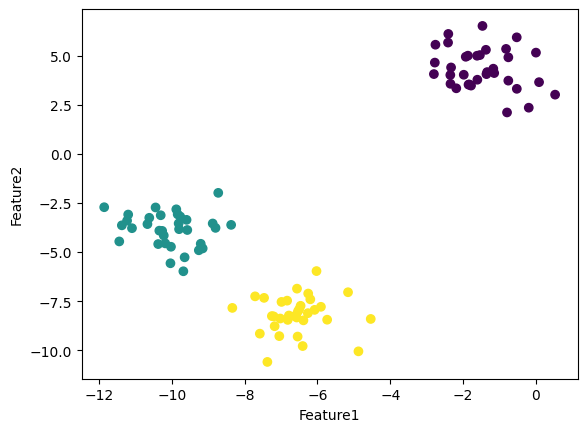

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("sample_cluster.csv")
X = df.drop("class", axis=1)
y = df["class"]

plt.scatter(X["Feature1"], X["Feature2"], c=y)
plt.xlabel("Feature1")
plt.ylabel("Feature2")

plt.show()

人の目で見ても、このデータは明確に3つのグループに分かれていることがわかる。

このデータに対して、k-平均法を用いてクラスターを求める。

実際にコードを下記に示す。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-平均法によって得られたクラスターのラベル: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
学習済みのk-平均法によるラベルの予測: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
ラベル0の重心座標 = [-10.04935243  -3.85954095]
ラベル1の重心座標 = [-1.4710815   4.33721882]
ラベル2の重心座標 = [-6.58196786 -8.17239339]


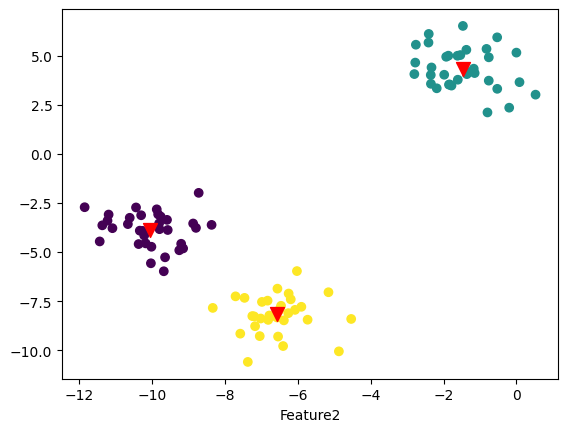

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("sample_cluster.csv")
X = df.drop("class", axis=1)
y = df["class"]

# k-平均法アルゴリズムの初期化(クラスター数3で指定)
kmeans = KMeans(n_clusters=3, random_state=0)

# .fitメソッドで学習(教師なし学習のため正解データを使わない)
kmeans.fit(X)

# .labels_でk-平均法で得られた各データのクラスターラベルが参照可能
print("k-平均法によって得られたクラスターのラベル: {}".format(kmeans.labels_))

# .predictメソッドでk-平均法によるラベルの予測が可能
y_pred = kmeans.predict(X)
print("学習済みのk-平均法によるラベルの予測: {}".format(y_pred))

# .cluster_centers_で各クラスター(ラベル)の重心座標が参照可能
print("ラベル0の重心座標 = {}".format(kmeans.cluster_centers_[0]))
print("ラベル1の重心座標 = {}".format(kmeans.cluster_centers_[1]))
print("ラベル2の重心座標 = {}".format(kmeans.cluster_centers_[2]))

# 重心付きでデータを描画
plt.scatter(X["Feature1"], X["Feature2"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="v", s=100, c='red')

plt.xlabel("Feature1")
plt.xlabel("Feature2")

plt.show()

グラフの通り、k-平均法によって3つのクラスターの重心が得られる。

これは直感的に正しいクラスタリングができていると言える。注目すべきは、正解データを用いずに学習している点である。

クラスタリングアルゴリズムはこのように正解データに頼らずクラスターの分類を行う。

教師あり学習の分類タスクと似ているが、クラスタリングは正解データを使わない点が異なる。

ただし、このクラスタリング結果を解釈するのは人であるという点に注意が必要。

まずk-平均法で得られたラベルと正解データ(class列)をよく見比べてみると、番号が異なることがわかる。

当然ながらこれはk-平均法自身がclass列を使わず、自動的にラベルを付けるため、そのラベル自体はclassの番号とは一致しない。

また、便宜上class列を用意したが、本来であればclass列がない状態でクラスタリングを行うことが多い。

その場合、ラベル0がどういうグループなのか、ラベル1はどういうグループなのかは人による解釈が必要となる。

### エルボー法によるクラスター数の推定

k-平均法はクラスター数(n_clusters)を指定するが、本来であればクラスター数は事前にわからないことが多い。

先ほどの例でいえば、散布図上の右上のクラスターとの離れ具合を考え、

下記のコードで示すようにクラスター数が2でも納得できるかもしれない。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-平均法によって得られたクラスターのラベル: [1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
学習済みのk-平均法によるラベルの予測: [1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
ラベル0の重心座標 = [-8.31566014 -6.01596717]
ラベル1の重心座標 = [-1.4710815   4.33721882]


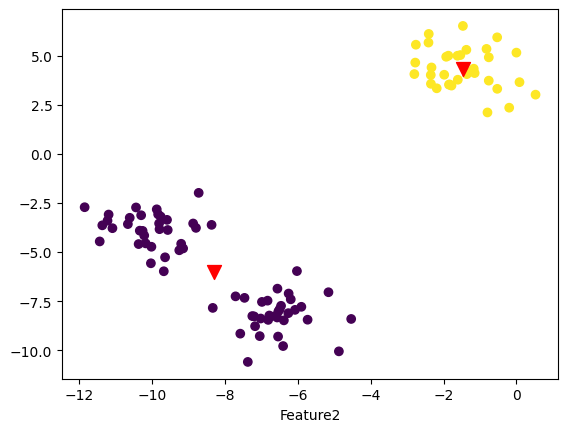

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("sample_cluster.csv")
X = df.drop("class", axis=1)
y = df["class"]

# k-平均法アルゴリズムの初期化(クラスター数3で指定)
kmeans = KMeans(n_clusters=2, random_state=0)

# .fitメソッドで学習(教師なし学習のため正解データを使わない)
kmeans.fit(X)

# .labels_でk-平均法で得られた各データのクラスターラベルが参照可能
print("k-平均法によって得られたクラスターのラベル: {}".format(kmeans.labels_))

# .predictメソッドでk-平均法によるラベルの予測が可能
y_pred = kmeans.predict(X)
print("学習済みのk-平均法によるラベルの予測: {}".format(y_pred))

# .cluster_centers_で各クラスター(ラベル)の重心座標が参照可能
print("ラベル0の重心座標 = {}".format(kmeans.cluster_centers_[0]))
print("ラベル1の重心座標 = {}".format(kmeans.cluster_centers_[1]))

# 重心付きでデータを描画
plt.scatter(X["Feature1"], X["Feature2"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="v", s=100, c='red')

plt.xlabel("Feature1")
plt.xlabel("Feature2")

plt.show()

また、クラスター数が多すぎる場合でも、特徴量が多く可視化してもわかりづらい場合などは、

適切なクラスター数がなかなか判断できないこともある。

そういった場合の1つの指標としてエルボー法がある。

エルボー法はクラスター数を変更しながら、各クラスターのデータとそのクラスターの重心の距離の総和を求め、

距離の総和がそれ以降ほとんど減らなくなったクラスター数を適切なクラスター数と推定する方法である。

具体的なコードを下記に示す。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

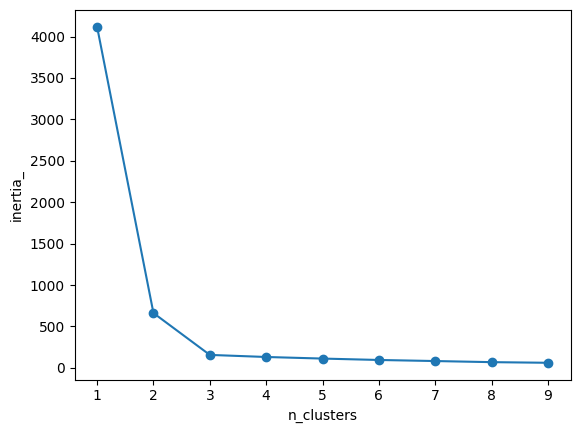

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("sample_cluster.csv")
X = df.drop("class", axis=1)
y = df["class"]

# クラスター数を1～9まで変更しながら重心との距離の総和を求める。
dist_list = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  # .itertia_で各クラスターの重心とそのクラスター内のデータの二乗誤差の総和が得られる。
  dist_list.append(kmeans.inertia_)

# 距離（二乗誤差）の総和を描画
plt.plot(range(1, 10), dist_list, marker='o')

plt.xlabel("n_clusters")
plt.ylabel("inertia_")

plt.show()

このグラフを見ると、クラスター数3までは急激に距離の総和が低下しているが、4以降はほとんど下がらないことがわかる。

このことからクラスター数は3であると推定するのがエルボー法である。

ちなみにこのグラフの形を腕とみなした時、適切なクラスター数がエルボー(肘)の位置であることが名前の由来である。


### k-平均法の弱点

k-平均法は重心を基準にクラスターを分けるアルゴリズムである。

そのため、2次元であれば円、3次元であれば球形、といった具合にクラスターを分ける。

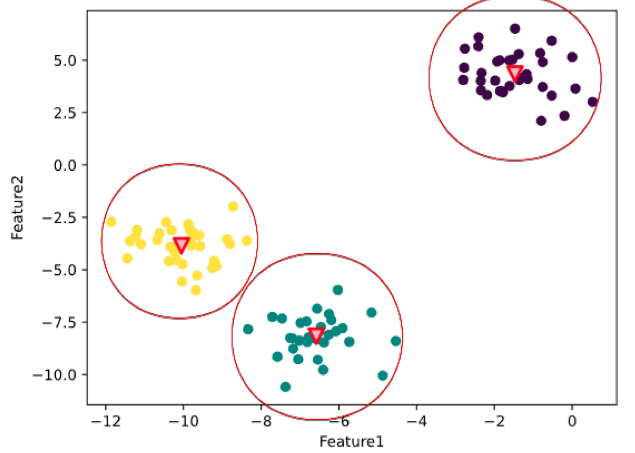

そのため、特殊な分布を持つデータに対しては機能しない。

moons.csvを用いて例を示す。

まずこのデータを可視化すると下記のようになる。

moons.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/moons.csv)からダウンロードできる。

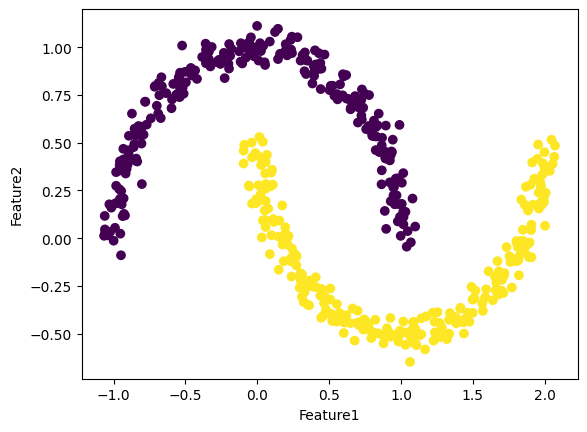

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("moons.csv")
X = df.drop("class", axis=1)
y = df["class"]

plt.scatter(X["Feature1"], X["Feature2"], c=y)
plt.xlabel("Feature1")
plt.ylabel("Feature2")

plt.show()

色分けの便宜上、正解データとなるclass列を持っているが、

このデータも2つの特徴量(Feature1, Feature2)を持つデータである。

見ての通り、Feature1とFeature2の散布図では2つのグループが半月型に分布していることがわかる。

このデータに対してクラスター数2でk-平均法を適用すると、下記のようになる。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


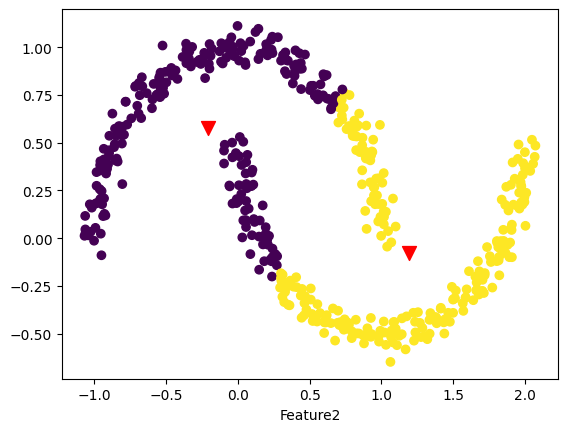

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("moons.csv")
X = df.drop("class", axis=1)
y = df["class"]

# k-平均法アルゴリズムの初期化(クラスター数3で指定)
kmeans = KMeans(n_clusters=2, random_state=0)

# .fitメソッドで学習(教師なし学習のため正解データを使わない)
kmeans.fit(X)

# .predictメソッドでk-平均法によるラベルの予測が可能
y_pred = kmeans.predict(X)

# 重心付きでデータを描画
plt.scatter(X["Feature1"], X["Feature2"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="v", s=100, c='red')

plt.xlabel("Feature1")
plt.xlabel("Feature2")

plt.show()

このように、k-平均法で得られたクラスターは実際の答えとは異なるクラスターが得られていることがわかる。

それはすなわち、このクラスタリングの結果を考察しても誤った分析結果を導くことにつながる。

### 教師あり学習への活用

k-平均法を用いた教師あり学習への活用方法について説明する。

具体的にはk-平均法により新しい特徴量を生成することで汎化性能の向上を行う。

先ほどmoons.csvにおいて、k-平均法により正しくクラスタリングできないことをを説明したが、

目的が教師あり学習であれば、下記のように多くのクラスター数を設定し、表現力を高める手法がある。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


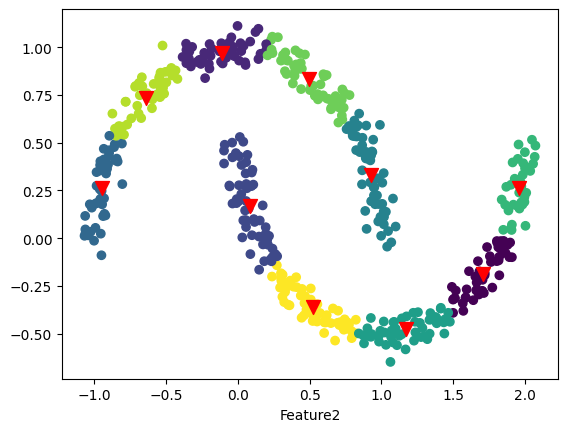

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

df = pd.read_csv("moons.csv")
X = df.drop("class", axis=1)
y = df["class"]

# k-平均法アルゴリズムの初期化(クラスター数10で指定)
kmeans = KMeans(n_clusters=10, random_state=0)

# .fitメソッドで学習(教師なし学習のため正解データを使わない)
kmeans.fit(X)

# .predictメソッドでk-平均法によるラベルの予測が可能
y_pred = kmeans.predict(X)

# 重心付きでデータを描画
plt.scatter(X["Feature1"], X["Feature2"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="v", s=100, c='red')

plt.xlabel("Feature1")
plt.xlabel("Feature2")

plt.show()

これらのクラスタリング結果自体は、人がデータを解釈する目的では用途がない。

しかし、各クラスターがどの正解classに属しているかは明確に言えそうだということがわかる。

ここでもともとの特徴量であるFeature1, Feature2を使った教師あり学習と、

クラスター情報から生成する特徴量を用いた教師あり学習を比較する。

まず、max_depth=3の決定木(分類木)で元々の特徴量を用いて教師あり学習を行う。

なお、決定木自体の表現力が高いため、max_depth=3という制限を加え、敢えて表現力を抑えている。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("moons.csv")
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print("train score: {}".format(score))
score = model.score(X_test, y_test)
print("train score: {}".format(score))

train score: 0.9226666666666666
train score: 0.88


次に、クラスター情報を用いた教師あり学習を行う。

具体的な方法は、個々のデータとすべてのクラスターの重心に対する距離を生成し、

それを特徴量として学習を行う。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

df = pd.read_csv("moons.csv")
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k-平均法アルゴリズムの初期化(クラスター数10で指定)
kmeans = KMeans(n_clusters=10, random_state=0)
# 教師あり学習であるため訓練データのみで学習
kmeans.fit(X_train)

# .transformメソッドで各クラスター重心からの距離を得る。
X_train_distance = kmeans.transform(X_train)
X_test_distance = kmeans.transform(X_test)

# transformの結果
print(X_train_distance.shape)
print(X_train_distance[0])


# 決定木に学習させる
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train_distance, y_train)
score = model.score(X_train_distance, y_train)
print("train score: {}".format(score))
score = model.score(X_test_distance, y_test)
print("train score: {}".format(score))

(375, 10)
[1.64444843 0.14157825 1.09618287 1.72119284 1.35906613 0.85171749
 1.74931345 0.56998045 0.91428967 1.53810087]
train score: 1.0
train score: 0.992


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


.transformメソッドにより各重心からの距離という特徴量を生成している。

クラスター数は10であるため、仕様上10個の特徴量が生成される。

この特徴量を用いて先ほど同様、max_depth=3の決定木で分類を行うと、

精度が向上している小ことがわかる。

これは、クラスタリングの結果を活用することで、元のデータに対して

教師あり学習アルゴリズムの表現力が足りていない場合でも、より高い汎化性能が期待できることを意味する。


このようにもともと持つデータから新しい特徴量を生成することで、

教師なし学習を教師あり学習に活用することができる。

## 2-2. DBSCAN
k-平均法は重心に基づくクラスタリングであったが、

ここで紹介するDBSCANは密度に基づくクラスタリングを行う。

またDBSCANの特徴として、クラスター数を自動的に調整する機能と、

どのクラスターにも属さないデータ(ノイズデータ)を判別する機能がある。

下記にノイズが混じっているmoon_noise.csvを用いて具体的なコードを示す。

moons_noise.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/moons_noise.csv)からダウンロードできる。

[ 0  0  0 -1 -1]


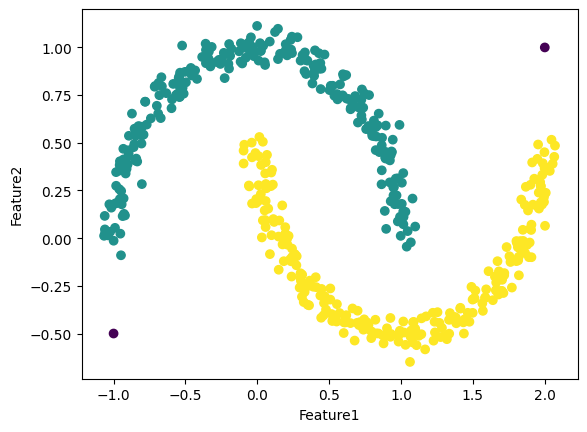

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df = pd.read_csv("moons_noise.csv")
X = df.drop("class", axis=1)
y = df["class"]

# ハイパーパラメータの調整を簡単に行う目的で、スケーリングを行う
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# 下記ハイパーパラメーターはデフォルト値
dbscan = DBSCAN(eps=0.5, min_samples=5)
# DBSCANは.predictメソッドを単独で持たない
y_pred = dbscan.fit_predict(X_scaled)
# クラスタリング結果の最後5件を表示、最後2件がノイズデータ
print(y_pred[-5:])

plt.scatter(X["Feature1"], X["Feature2"], c=y_pred)

plt.xlabel("Feature1")
plt.ylabel("Feature2")

plt.show()

DBSCANで重要なハイパーパラメータは下記の2つ。
- eps: ある2つのデータが近傍(距離が近いデータ)と見なされる最大の距離
- min_samples: コアポイントと見なされるための最小値。コアポイントとは、半径eps内にmin_samples個以上のデータがあるデータのこと。

DBSCANは上記パラメータによって距離が近いデータ同士（あるコアポイントから距離eps以内で辿れるすべてのデータ）でクラスターを形成する。

データ同士の距離を基準にするため、密度の高い部分がクラスターとなる。

コアポイントでもなく、他のコアポイントから到達できないデータはノイズデータとして分類される。

（ラベルが-1となる)

scikit-learnにおけるDBSCANの特徴として、.predictメソッドがない点があげられる。

これは未知データに対する予測が行えないことを意味する。

そのため、教師あり学習にはそのまま活用できないのでDBSCANは探索的なデータ分析で用いられることが多い。

## 2-3. 練習問題

### 2-1.
sample_cluster2.csvは2つの特徴量(Feature1, Feature2)のみを持つデータである。

このデータに対し、Feature1, Feature2の散布図を描画し、目で見た結果やエルボー法を用いて

適切なクラスター数を推定したうえで、k-平均法でクラスタリングせよ。

また、その結果を用いて、散布図を色分けし、重心も描画せよ。

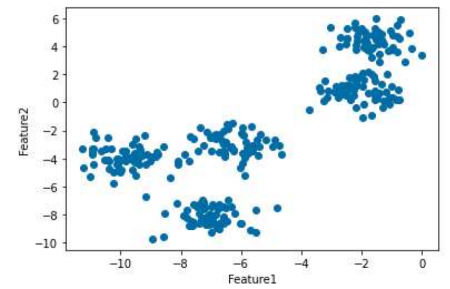

エルボー法による折れ線グラフや色分けした散布図はクラスター数の推定につながるため、

ここでは表示しない。

# 3. 次元削減

本章では、具体的な次元削減のためのアルゴリズムとして、主成分分析(PCA)とt-SNEについて

使い方と活用方法について説明する。

## 3-1. 主成分分析(PCA)

主成分分析は次元削減における代表的な手法の1つである。

多次元のデータセットを分散が大きい方向から軸を取り直す変換を行うことで、

より少ない次元でデータセットを説明することができる。

主成分分析によって変換された新しい特徴量のことを主成分と呼び、

説明力の高い順に第1主成分、第2主成分、…、第n主成分と呼ぶ

実際にbreast_cancer.csvを用いて、主成分分析を適用するコードを下記に示す。

このデータセットは正解データを持っているが、結果の可視化のために利用する。

breast_cancer.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/breast_cancer.csv)からダウンロードできる。

(569, 30)
(569, 30)
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


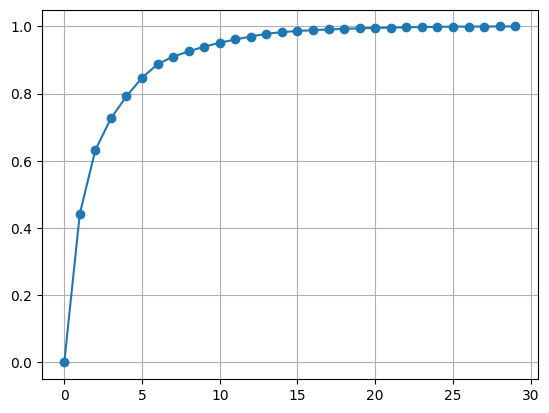

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)

# 標準化処理
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# 主成分分析による変換
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# 変換前と変換後のshape
print(X.shape)
print(X_pca.shape)

# .explained_variance_ratio_で寄与率を取得
print(pca.explained_variance_ratio_)

# 累積寄与率の描画
y_data = []
for i in range(30):
  y_data.append(sum(pca.explained_variance_ratio_[:i]))

plt.plot(np.arange(30), y_data, 'o-')

plt.grid()
plt.show()

まず、主成分分析をするにあたり、データセットのスケーリング処理を行い、

スケールの違いによる影響をなくしておくのが一般的である。

主成分分析によるデータセットの変換は、標準化処理と同じく.fitメソッド、.transformメソッドで変換できる。

変換前後のデータセットのshapeは特に変わりないことがわかる。

主成分分析を適用した段階では、単にデータが変換されただけである。

注目すべきは寄与率という情報である。

寄与率が高いほど、その主成分が元のデータセットに対する説明力が高いことを意味する。

見ての通り、第1主成分から順に説明力が高い。

また、累積寄与率のグラフを見ると、第15主成分以内でほぼほぼ元のデータを説明できることがわかる。

これは30次元あった元のデータセットを説明力をほとんど失わずに、

15次元以下のデータセットに変換できることを意味するため、説明力をほとんど失わずに、次元を削減できるということである。



### 教師あり学習への活用

主成分分析は結果の解釈が難しい。

多次元のデータセットに対して、主成分分析を行うことで

2、3次元のデータセットに要約することで可視化しやすくなるが、

特徴量の名前は第1主成分、第2主成分、…となっており、特別意味があるわけではない。

元々のデータセットにあるような、例えば年齢や身長といったわかりやすい名前は失われる。

どちらかというと主成分分析の結果は、他の分析の前処理に活用されることが多く、

教師あり学習への活用もその一つとなる。

試しに、最も説明力の高い第1主成分と第2主成分の散布図を正解データで色分けを行うコードを下記に示す。

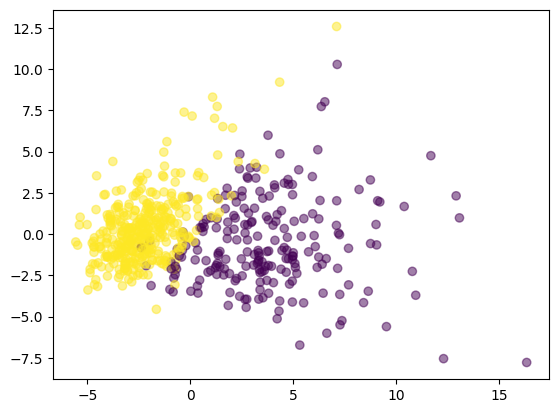

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]

# 標準化処理
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# 主成分分析による変換
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# 第1主成分と第2主成分の散布図と正解データによる色分け
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.show()

この結果を見ると、一部重なりはあるものの、第1主成分と第2主成分のみで

ある程度の精度で分類ができそうであることがわかる。

これは主成分分析が正解データを用いずとも、元のデータの特徴を少ない次元でよく捉えていることを意味する。

教師あり学習に活用する具体的な例として、次元削減を行ってから教師あり学習するコードを下記に示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# k-NNによる分類
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("StandardScaler only: {}".format(score))

# 主成分分析を行い、10次元に削減
pca = PCA(n_components=10) # n_componentsで次元数を制御
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# 次元削減後に同じ分類アルゴリズムで分類
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("StandardScaler + PCA(10): {}".format(score))

StandardScaler only: 0.9370629370629371
StandardScaler + PCA(10): 0.9370629370629371


主成分分析によって10次元に削減しても同等の性能を維持できていることがわかる。

一般的に教師あり学習では、過学習を避けるためにより少ない次元数でモデルを構築したいという要求がある。

また特徴量が多すぎると学習に必要なでーて数が指数関数的に増加する傾向があるため、

次元数を少なくしておきたいという場合もある。

そのため、教師あり学習を行う前の次元削減のために主成分分析などが使われることが多い。

### 主成分分析の弱点

主成分分析は特徴量の分布が正規分布に従っている時には適した変換となるが、

画像データのような特殊な分布を持つデータや非線形なデータには適さない。

ここではdigits.csvを使って実験を行う。

このデータセットの説明変数は下記のような0～9の手書き数字画像データを数値化したもので、

8×8のキャンバスの各ピクセルの色（白色の0から黒色の16までのグレースケール）を表している。

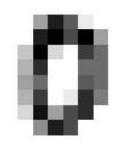

このデータセットに対して第1主成分と第2主成分の散布図を正解データで色分けを行う。

digits.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/digits.csv)からダウンロードできる。

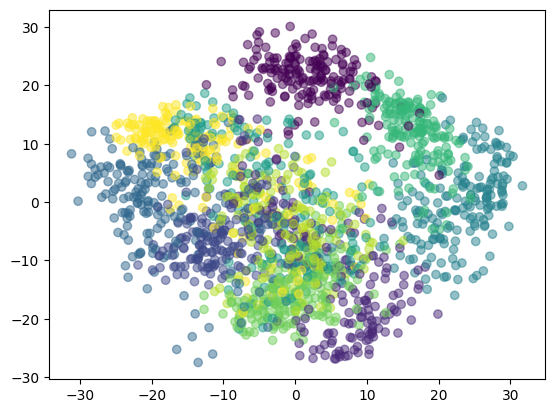

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

df = pd.read_csv("digits.csv")

X = df.drop("number", axis=1)
y = df["number"]

# 各特徴量ば0～16で統一されているのでスケーリングは不要

# 主成分分析
pca = PCA() # n_componentsで次元数を制御
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

このように、特定の数字はある程度特徴を捉えているように見えるが、

一部はかなり重なり合っており、特徴を捉えきれてはいないことがわかる。

## 3-2. t-SNE

特徴量が特殊な分布においても機能する次元削減のアルゴリズムの一つにt-SNEがある。

先ほど主成分分析で行ったdigits.csvに対する2次元の散布図の描画を、t-SNEで行うコードを下記に示す。

t-SNEは計算量が多く、実行にある程度の時間がかかる。

(1797, 2)


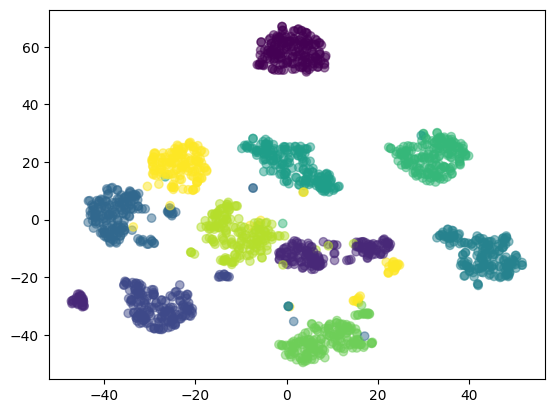

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE

df = pd.read_csv("digits.csv")

X = df.drop("number", axis=1)
y = df["number"]

tsne = TSNE(random_state=0)
tsne.fit(X)

# t-SNEは.transformメソッドがない
X = tsne.fit_transform(X)

# shapeの確認
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

主成分分析に比べると、たった2次元の圧縮で各数字の特徴を非常によく捉えられていることがわかる。

しかし、scikit-learnにおけるt-SNEには.transformメソッドがないことと、計算量が多く、

特徴量とデータ数に比例して実行時間が長くなるため、主にデータ分析の初期フェーズにおいて

データの特徴をつかむための可視化目的で利用することが多い。

## 3-3. 練習問題

### 3-1.

iris.csvに対して主成分分析を行い、累積寄与率の折れ線グラフ、

および第1主成分と第2主成分による散布図を描画せよ。

また散布図は正解データごとに色分けせよ。

なお、iris.csvの特徴量は単位(cm)が統一されているため、標準化処理は不要である。

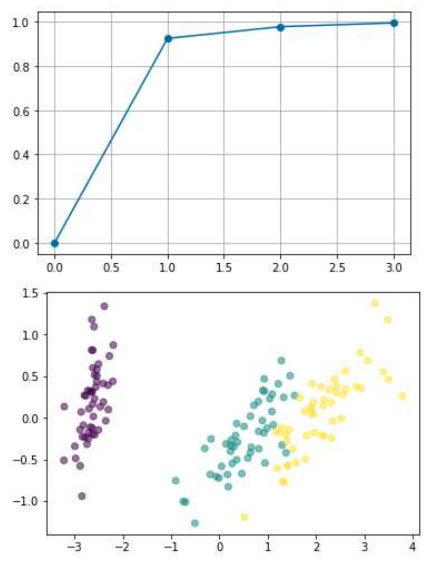

iris.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/iris.csv)からダウンロードできる。

# 4. 演習および課題

## 4-1. 演習

### 演習1.

iris.csvに対して主成分分析を行った後、クラスター数3のk-平均法でクラスタリングせよ。

また第1主成分と第2主成分、および第1主成分と第3主成分による散布図を描画し、

k-平均法の予測結果ごとに色分けせよ。

また、正解データに対しても同様に色分けした散布図を描画し、結果を比較せよ。

**正解データで色分け**

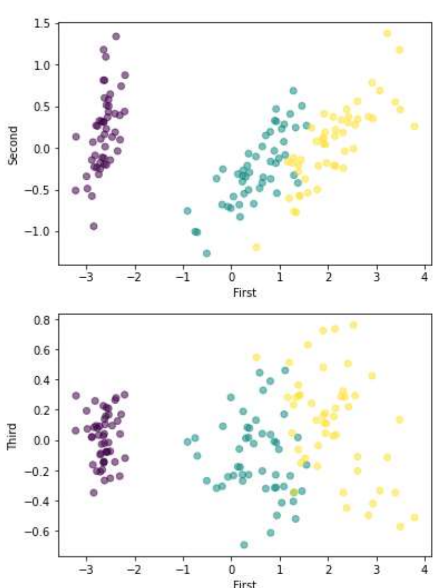

**クラスタリングの結果で色分け**


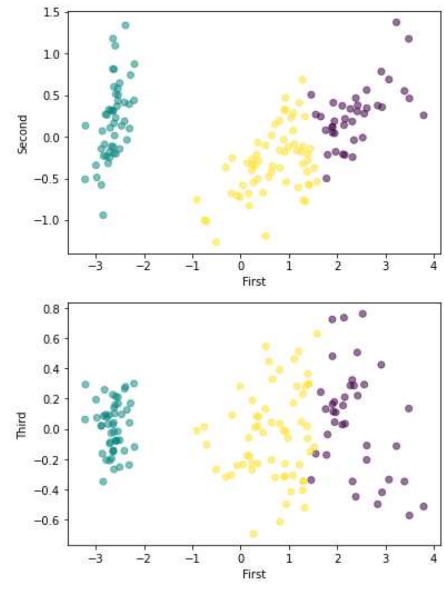

### 演習2.

breast_cancer.csvに対して主成分分析を行い10次元に次元削減した後、

下記設定で教師あり学習モデルを構築せよ。

- train_test_splitの設定：test_size=0.25, random_state=0
- 学習アルゴリズム：GradientBoostingClassifier
- グリッドサーチで探索するパラメータ：n_estimatorsを[50, 75, 100]、max_depthを[2, 3, 4]
- グリッドサーチのcv：8
- グリッドサーチの評価指標：AUC
- 出力：グリッドサーチの最高スコア、最適パラメータ、訓練データスコア、テストデータスコア

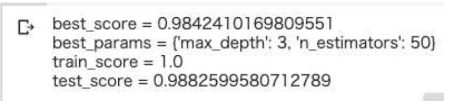

## 4-2. 課題

### 課題1.
boston.csvの回帰タスクについて、今まで学んだ内容を用いてモデルの精度を可能な限り高めよ。

ただし、下記設定を条件とする。学習済みモデルをpickleを使い出力し、そのモデルとモデルを生成したコードを提出せよ。

- 学習に使う次元数(説明変数の個数)は最大5個
- train_test_splitは下記の設定とする。

 - test_size=0.25
 - random_state=0
- グリッドサーチを利用し、下記の設定とする。

 - cv: 10
 - 評価指標： 決定係数($R^2$)
- 出力：グリッドサーチの最高スコア、最適パラメータ、訓練データスコア、テストデータスコア